# Anslysis of iDDN simulation results on different subset of the data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from iddn_paper import sim3_h5op, tool_draw, tool_sys, tool_eval

# exp_name = "sim3_direction_two_layer_batch_256841"
# exp_name = "sim3_direction_two_layer_batch_388254"
exp_name = "sim3_direction_two_layer_batch_428416_lin"

n_sample_work = 50

top_folder = tool_sys.get_work_folder() + "sim_iddn_data"
dat_file = f"{top_folder}/sim_input/{exp_name}.hdf5"

dat1, dat2, con_mat1, con_mat2, comm_gt, diff_gt, dep_mat_null, dep_mat_prior, dep_mat_prior_loose, layer_count = (
    sim3_h5op.read_sim_data(dat_file)
)


In [7]:
f_iddn0 = f"{top_folder}/sim_output/{exp_name}_iddn_sample_{n_sample_work}_sigma_0.0_msk_0.hdf5"
f_iddn1 = f"{top_folder}/sim_output/{exp_name}_iddn_sample_{n_sample_work}_sigma_0.0_msk_1.hdf5"


In [8]:
dep_iddn = tool_eval.read_res_h5(f_iddn0, tt=False)
res_comm_iddn0, res_diff_iddn0, res_g1_iddn0, res_g2_iddn0, _, _ = tool_eval.gather_res(
    dep_iddn, comm_gt, diff_gt, con_mat1, con_mat2, msk_in=dep_mat_prior
)

dep_iddn = tool_eval.read_res_h5(f_iddn1, tt=False)
res_comm_iddn1, res_diff_iddn1, res_g1_iddn1, res_g2_iddn1, _, _ = tool_eval.gather_res(
    dep_iddn, comm_gt, diff_gt, con_mat1, con_mat2, msk_in=dep_mat_prior
)


['dep_est']
(32, 40, 11, 2, 250, 250)
['dep_est']
(32, 40, 11, 2, 250, 250)


In [9]:
def draw_lines_rho1_rho2(
    res_iddn_lst,
    title_mean="Common network",
    xlim=None,
    ylim=None,
    marker_size=0.2,
    line_width=0.2,
):
    colors = ['blue', 'orange', 'green', 'black']
    plt.figure()
    for ii, res_ddn in enumerate(res_iddn_lst):
        rho2_rg = range(res_ddn.shape[1])
        for i in rho2_rg:
            plt.plot(
                res_ddn[:, i, 2],
                res_ddn[:, i, 4],
                "-o",
                color=colors[ii],
                markersize=marker_size,
                linewidth=line_width,
            )

    if xlim is None:
        plt.xlim([-0.05, 1.05])
    else:
        plt.xlim(xlim)
    if ylim is None:
        plt.ylim([-0.05, 1.05])
    else:
        plt.ylim(ylim)
    plt.title(title_mean)
    plt.show()


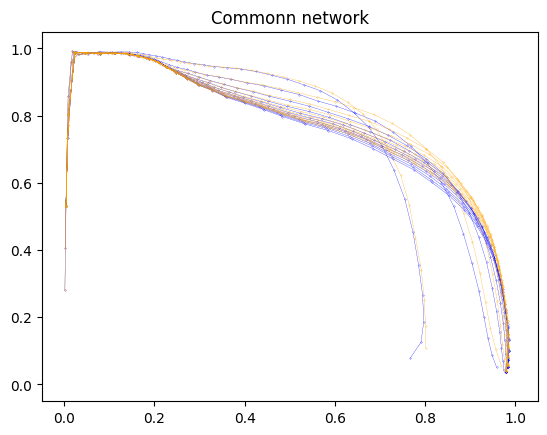

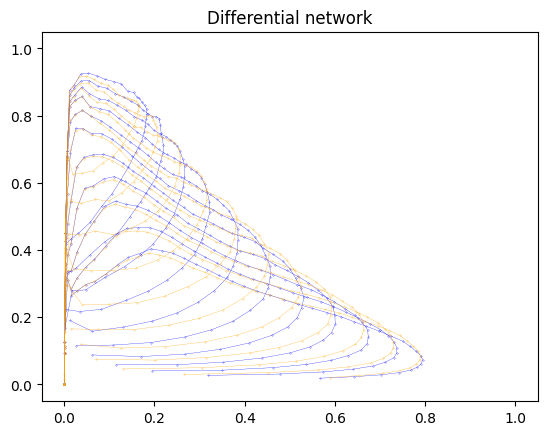

In [10]:
draw_lines_rho1_rho2(
    res_iddn_lst=[res_comm_iddn0, res_comm_iddn1],
    title_mean="Commonn network",
)
draw_lines_rho1_rho2(
    res_iddn_lst=[res_diff_iddn0, res_diff_iddn1],
    title_mean="Differential network",
)
